In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
file_path = "/content/xAPI-Edu-Data.csv"
df = pd.read_csv(file_path)

In [ ]:
# Check the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
  gender NationalITy PlaceofBirth     StageID GradeID SectionID Topic  \
0      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
1      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
2      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
3      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
4      M          KW       KuwaIT  lowerlevel    G-04         A    IT   

  Semester Relation  raisedhands  VisITedResources  AnnouncementsView  \
0        F   Father           15                16                  2   
1        F   Father           20                20                  3   
2        F   Father           10                 7                  0   
3        F   Father           30                25                  5   
4        F   Father           40                50                 12   

   Discussion ParentAnsweringSurvey ParentschoolSatisfaction  \
0          20                

In [ ]:
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values)


Missing Values:
 gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64


In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
print("\nUnique Values in Categorical Columns:\n")
for col in categorical_columns:
    print(f"{col}:\n{df[col].unique()}\n")



Unique Values in Categorical Columns:

gender:
['M' 'F']

NationalITy:
['KW' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Palestine' 'Iraq' 'Lybia']

PlaceofBirth:
['KuwaIT' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Iraq' 'Palestine' 'Lybia']

StageID:
['lowerlevel' 'MiddleSchool' 'HighSchool']

GradeID:
['G-04' 'G-07' 'G-08' 'G-06' 'G-05' 'G-09' 'G-12' 'G-11' 'G-10' 'G-02']

SectionID:
['A' 'B' 'C']

Topic:
['IT' 'Math' 'Arabic' 'Science' 'English' 'Quran' 'Spanish' 'French'
 'History' 'Biology' 'Chemistry' 'Geology']

Semester:
['F' 'S']

Relation:
['Father' 'Mum']

ParentAnsweringSurvey:
['Yes' 'No']

ParentschoolSatisfaction:
['Good' 'Bad']

StudentAbsenceDays:
['Under-7' 'Above-7']

Class:
['M' 'L' 'H']



In [ ]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

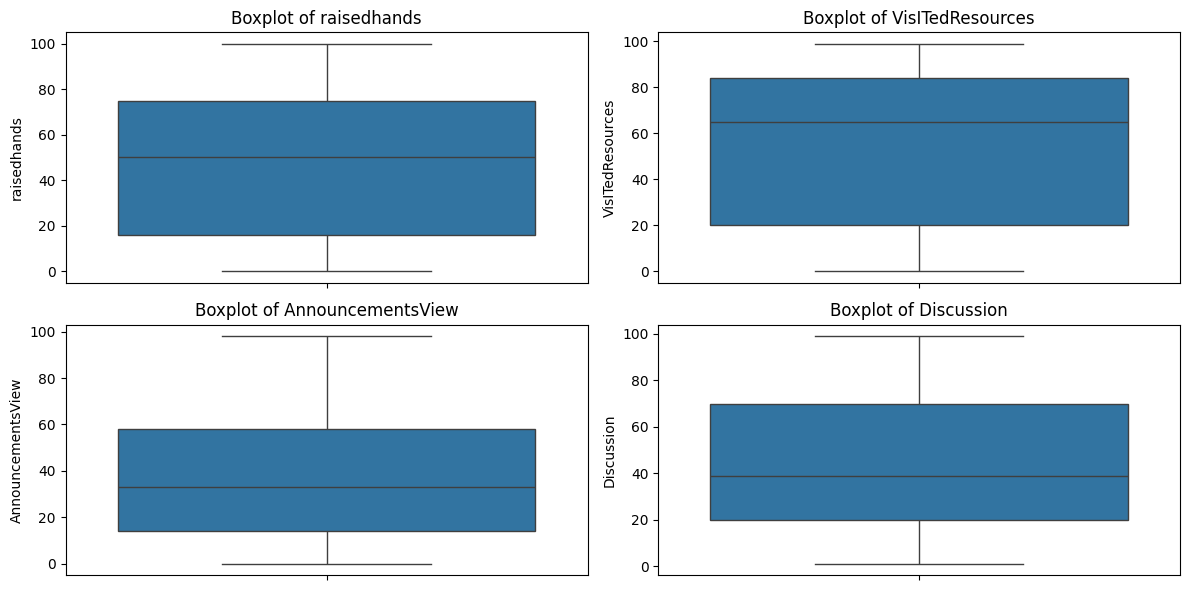

In [ ]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [ ]:
skewness = df[numeric_columns].skew()
print("\nSkewness of Numeric Variables:\n", skewness)


Skewness of Numeric Variables:
 raisedhands          0.026962
VisITedResources    -0.342441
AnnouncementsView    0.399243
Discussion           0.362594
dtype: float64


In [ ]:
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = df.copy()
for col in numeric_columns:
    df_cleaned[col] = np.where(df_cleaned[col] < lower_bound[col], lower_bound[col], df_cleaned[col])
    df_cleaned[col] = np.where(df_cleaned[col] > upper_bound[col], upper_bound[col], df_cleaned[col])

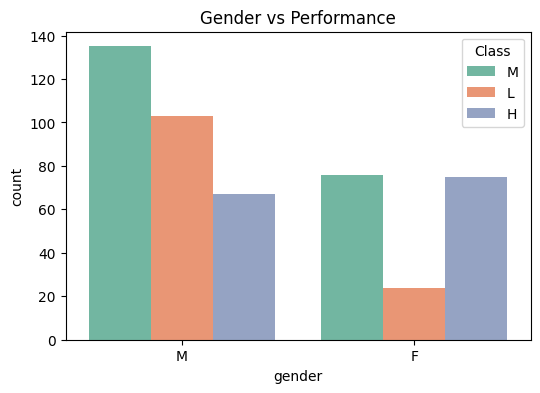

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', hue='Class', data=df, palette='Set2')
plt.title("Gender vs Performance")
plt.show()


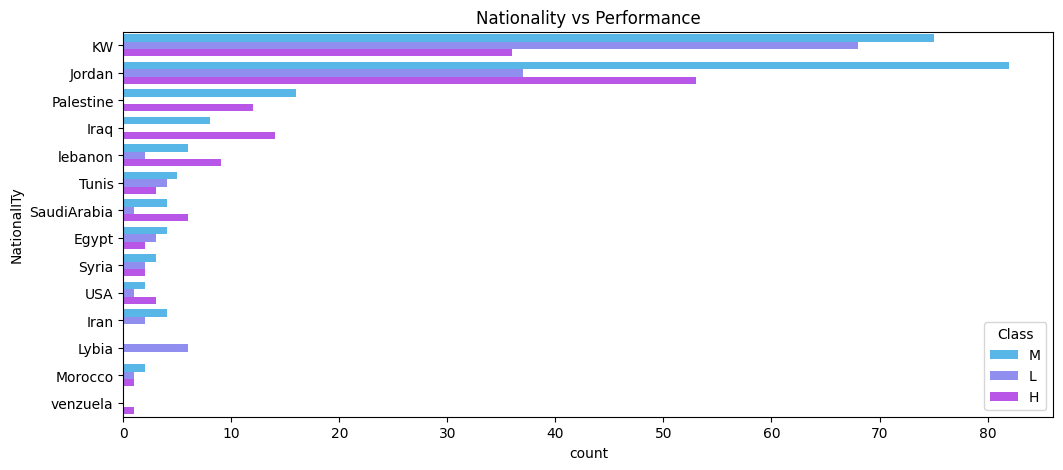

In [ ]:
plt.figure(figsize=(12, 5))
sns.countplot(y='NationalITy', hue='Class', data=df, palette='cool', order=df['NationalITy'].value_counts().index)
plt.title("Nationality vs Performance")
plt.show()


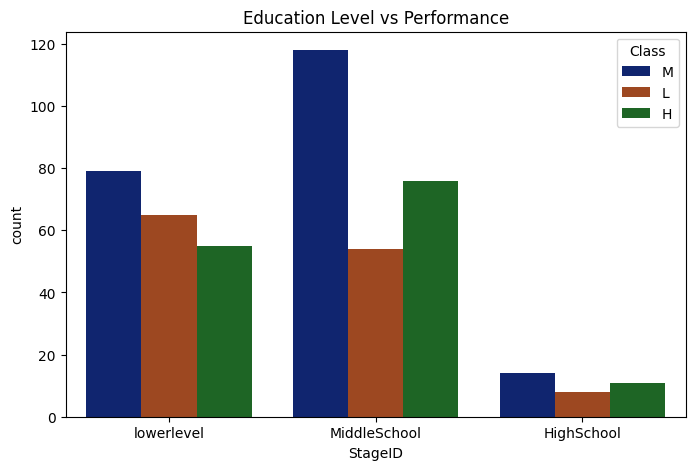

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='StageID', hue='Class', data=df, palette='dark')
plt.title("Education Level vs Performance")
plt.show()


<ipython-input-23-3f348dc679c8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='StudentAbsenceDays', y='raisedhands', data=df, palette='coolwarm')


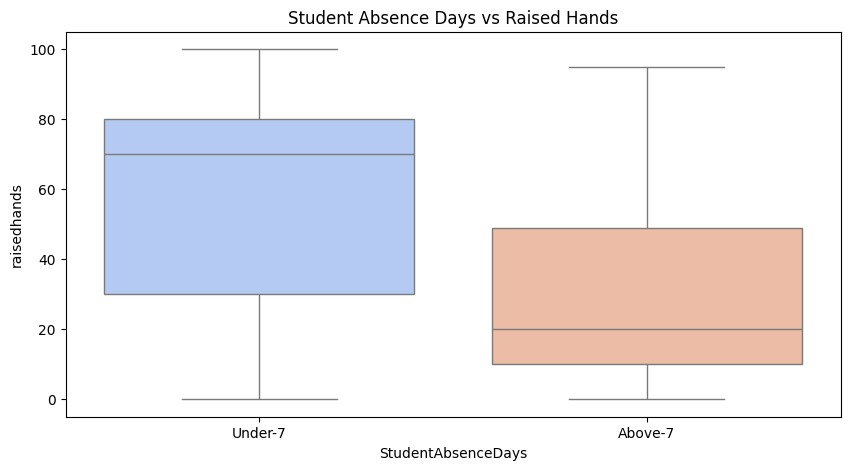

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='StudentAbsenceDays', y='raisedhands', data=df, palette='coolwarm')
plt.title("Student Absence Days vs Raised Hands")
plt.show()


Skewness Before Transformation: 0.02696178747658152


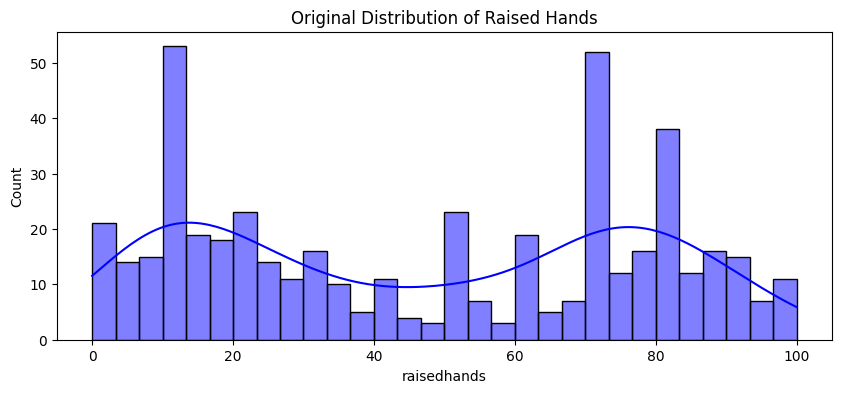

Box-Cox transformation applied with lambda = 0.5780549214822311
Skewness After Transformation: -0.27613668417755627


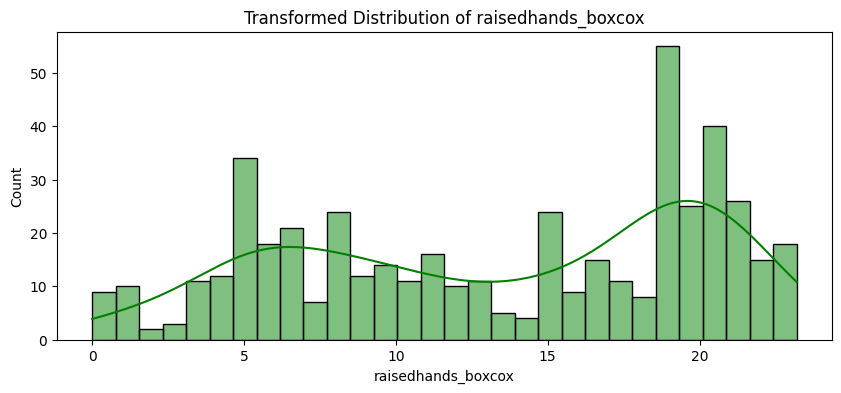

In [ ]:
from scipy.stats import boxcox
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Check Skewness Before Transformation
print(f"Skewness Before Transformation: {df['raisedhands'].skew()}")

# Plot Original Distribution
plt.figure(figsize=(10, 4))
sns.histplot(df['raisedhands'], bins=30, kde=True, color='blue')
plt.title("Original Distribution of Raised Hands")
plt.show()

# Apply Log Transformation (if all values are positive)
if (df['raisedhands'] > 0).all():
    df['raisedhands_log'] = np.log(df['raisedhands'] + 1)  # Adding 1 to avoid log(0)
    transformed_column = 'raisedhands_log'
    print("Log transformation applied.")
else:
    # Apply Box-Cox Transformation for normalization
    df['raisedhands_boxcox'], lambda_val = boxcox(df['raisedhands'] + 1)  # Box-Cox requires positive values
    transformed_column = 'raisedhands_boxcox'
    print(f"Box-Cox transformation applied with lambda = {lambda_val}")

# Check Skewness After Transformation
print(f"Skewness After Transformation: {df[transformed_column].skew()}")

# Plot Transformed Distribution
plt.figure(figsize=(10, 4))
sns.histplot(df[transformed_column], bins=30, kde=True, color='green')
plt.title(f"Transformed Distribution of {transformed_column}")
plt.show()
